# One Discipline: Two Paradigms




### Symbolic AI
<img style="float:right;" src="figs/mind.png">

Inspired by ideas of the mind and  building on thousands of years of philosophy about:

- what can be known,  
world models, absolute truths
- types of logic, 
- facts, rules, ...

Reasoning with symbols that 'stand for' external entities or 'truths'.
 - this was mainstream AI for decades


### Computational AI: 
<img style="float: right;" src="figs/brain.jpg">

Inspired by the idea of problem solving arising from  computational processes 
- the brain   
  - a neural signal processor  
    with adaptive connections
- Genetics + Darwinian evolution 
- Social Insect Colonies

All _appear_ to exhibit intelligent problem solving behaviour

 

# How would you describe these three types of fruit?


  
</div><div height = 50%>
    <div width=25% style="float:left">  <img style="width:100px" src="./figs/green_apple.jpg" alt="Picture of an apple"/>   </div>
    <div width=25% style="float:centre">  <img style="width:100px" src="./figs/banana.jpg" alt="Picture of a banana"/>   </div>
        <div width=25% >  <img  style="width:100px" src="./figs/orange.jpg" alt="Picture of an orange" style="float:right"/>   </div>
</div>  

Many people might say:
- Apples are green and round and have smooth skin
- Oranges are orange and round and have rough skin
- Bananas are yellow and long and pointed at both ends and have smooth skin. 

## Symbolic AI says that these are all examples of an abstract class 
e.g. 'Apples', 'Oranges' or 'Bananas'.

To reason about them we make statements in a 'world-model' that are True or False for things of that type
 - A **Model** encoding human expertise is often  called the **'knowledge base'**

A mixture of **Facts**

|          | Apples | Oranges | Bananas |
|----------|--------|---------|---------|
| isGreen  | True   |         |         |
| IsOrange |        | True    |         |
| isYellow |        |         | True    |
| isRound  | True   | True    |         |
| isLong   |        |         | True    |
| isRough  |        | True    |         |
| isSmooth | True   |         | True    |

 And  **logic**   

usually **Rules** that we can apply to generate new facts  

_isRound(x)_ AND _isGreen(x)_  AND _isSmooth(x)_   => _isApple(x)_

_isRound(x)_ AND _isOrange(x)_ AND _isRough(x)_    => _isOrange(x)_

_isLong(x)_  AND _isYellow(x)_ AND _isSmooth(x)_   => _isBanana(x)_

## Using a symbolic AI model for prediction

 <img style="float:right" src = "figs/lime.jpg">
 
1. Create the **model** by encoding this knowledge  using rules in your chosen type of  logic 
 


 
2. provide **input** in the form of 'assertions' about a new bit of fruit
 - _isRound(newfruit)_ = True
 - _isGreen(newfruit)_ = True
 
 
3. Make a **prediction** by applying logic (deduction) to infer the _**output**_ 
 - _isApple(newfruit)_ = False

## How does this work in the real world?
1. Decide on a set of features you can measure about objects, for example:
 - weight in grammes
 - height/width in cm
 - mean RGB values of image

2. Measure values of those features for a set of examples
 - store these in a Dataset (e.g. numpy 2D array).
 - one row per example,
 - one column for each feature 
 - one column for the label (orange/apple/banana)  
  or put the label in a separate array

**Colour**     (from www.colorhexa.com)
-    In a RGB color space, hex #ffe135 (also known as Banana yellow) is composed of 100% red, 88.2% green and 20.8% blue. 
-    In a RGB color space, hex #8db600 (also known as Apple green) is composed of 55.3% red, 71.4% green and 0% blue.
-    In a RGB color space, hex #ffa500 (also known as Orange) is composed of 100% red, 64.7% green and 0% blue.
    
**Size** from quick search on internet (using the _'are sites consistent?'_ heuristic)
-    banana: width 130 +/- 15 mm height 28 +/- 05 cm, weight 125 +/- 10 gm
- apple    width = height = 80mm  +/-    weight = 340 g
- orange   width = height = 76mm   +/-   weight = 357 g
    
    

````
# values ( mean_red, mean_green, mean_blue,width, height, weight)
typical_banana = (100,88.2,20.8,130,28,125 )
typical_apple = (55.3,71.4,0,80,80,340)
typical_orange = (100,64.7,0,76,76,357)
````

# Make some fake data
 Unless you each have thre pieces of fruit with you?

### We'll use a function built into sklearn to create datasets
It takes the 'ideal' values then adds small amounts of noise

In [1]:
import w1_utils, numpy as np, matplotlib.pyplot as plt

np.set_printoptions(precision=2)

feature_values, labels = w1_utils.make_fake_fruit()
for feats, label in zip(feature_values, labels):
    print(feats, label)

[ 44.21  73.5    3.07  81.47  83.16 343.37] apple
[101.67  55.62   1.86  84.35  72.54 353.14] orange
[100.55  90.06  22.68 126.94  26.37 124.16] banana
[109.24  56.34   4.71  80.53  84.9  350.35] orange
[100.03  69.81   5.19  77.81  72.03 358.25] orange
[103.75  89.53  23.59 132.31  38.82 124.12] banana
[ 52.62  80.91  -3.44  87.37  77.37 347.06] apple
[ 59.22  76.45  -6.88  78.92  80.9  349.7 ] apple
[104.31  64.2    5.17  85.39  85.16 349.92] orange
[ 96.3   54.81   7.96  69.96  75.39 363.65] orange
[ 60.33  72.42   5.01  84.46  81.81 340.08] apple
[ 57.74  65.68  -7.06  79.4   84.19 340.73] apple
[105.16  90.41  16.8  134.12  17.6  128.87] banana
[107.06  67.01   1.7   85.58  80.39 362.32] orange
[ 57.19  68.82   6.84  82.43  79.82 334.73] apple
[ 57.01  68.23   2.18  76.55  82.88 340.55] apple
[ 97.36  85.81  26.87 132.79  28.38 117.32] banana
[100.91  80.75  11.62 139.43  15.5  120.9 ] banana
[ 97.5   63.61   0.81  74.06  73.01 354.78] orange
[ 57.46  73.69 -14.47  80.1   73.77 32

### We list our data and use matplotlib to create visualisations of what our data looks like

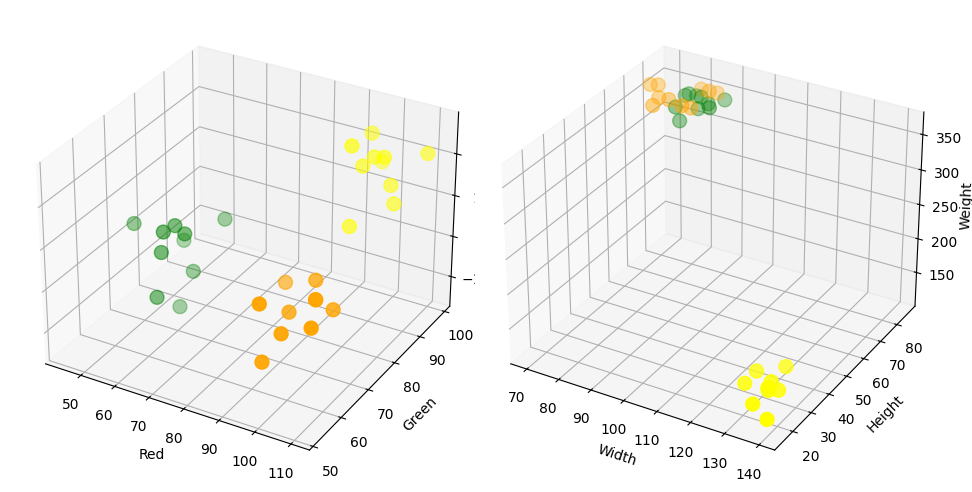

In [2]:
fig = w1_utils.make3dscatters(feature_values, labels)
plt.show()

## Symbolic AI
Have to write code  that can:
 - extract meaning from these numerical features
 - to generate True/False for symbols like isLong() or isYellow()
 - those symbols are what used to do reasoning in the model

# Computational AI: 

- **Machine Learning**  creates models using algorithms that learn by trial and error from datasets (examples)
- **Heuristic Optimisation** takes a similar 'trial and error' approach to finding and improving solutions to optimisation problems

## Our fruit example

1. Get dataset of examples
2. Apply an algorithm to **find decision boundaries** that separate the examples into classes    
learned model = set of decision boundaries + labels for the regions they define
3. Make **prediction** by looking at where a new example is in relation to those boundaries

# Summary
## Two different approaches,  both with strengths and weaknesses
 1. Symbolic (Knowledge-based):
  - based on logic, facts and rules
  - uses a human-provided world model
 2. Computational AI
  - Algorithms that learn from experience
  - only as good as their experience
  

## Key Difference: 
In symbolic AI everything 'stands for' something in the real world.

- So you might write a function: Bool  isYellow( inr red, int green, int blue)
 - but it would be meangingless to pass values for width/height/weight into isYellow()
 - and the rules that define the 'fruit' model can't be used for anything else

In Computational AI 'everything is just numbers', 
- nothing has any special meaning
- so algorithms become more re-usable.

## You need to be able to: 
 - **Describe** the differences between these approaches
 - **Select** (and explain) whether to choose a computational or knowledge-based solution  
 to solve a given problem _in it's context_. 
 